<a href="https://colab.research.google.com/github/manishaachary13/crop_yield_predictoin_ML/blob/main/field.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://th.bing.com/th/id/OIP.Ewx1gNMqBGcg4IOZRkdWKQHaDO?w=350&h=152&c=7&r=0&o=5&pid=1.7' width="1000" >

# **Crop Yield Prediction**

## **Problem Statement**

**Crop yield prediction** is critical for optimizing agricultural productivity and addressing food security challenges. This project aims to leverage historical agricultural data to develop a predictive model that accurately forecasts crop yields for different regions and crops. The dataset includes features such as geographic area, crop type, and temporal factors (e.g., year), along with historical yield values.

The primary objective is to build a machine learning model to predict crop yields based on the provided features, enabling stakeholders to:

1. **Optimize Resource Allocation:** Improve decision-making related to the distribution of resources such as fertilizers, water, and labor across regions.
2. **Enhance Food Security**: Provide reliable yield predictions to governments, NGOs, and agricultural organizations to prepare for potential shortages or surpluses.
3. **Support Sustainable Farming:** Enable farmers to adopt practices that enhance productivity while minimizing environmental impact.
4. **Strategic Planning**: Aid policymakers and agricultural planners in forecasting and planning at national or regional levels, reducing risks related to climate change, pests, or diseases.

## **Load and Inspect Dataset**

#### Import Libraries

In [98]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
# Basic Libraries
import numpy as np  # For numerical computations and array manipulations
import pandas as pd  # For data manipulation and analysis
# Data Visualization
import matplotlib.pyplot as plt  # For creating static plots and visualizations
import seaborn as sns  # For advanced and aesthetic data visualizations
# Data Preprocessing and Feature Engineering
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For feature scaling (normalization and standardization)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # For encoding categorical variables
# Machine Learning Models
from sklearn.linear_model import LinearRegression  # Simple linear regression model (baseline)
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Advanced ensemble models
from xgboost import XGBRegressor  # Extreme Gradient Boosting model
from lightgbm import LGBMRegressor  # Light Gradient Boosting Machine

# Model Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Metrics for regression evaluation
# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  # Tools for tuning model hyperparameters
# Utility Libraries
import warnings  # For handling warnings
warnings.filterwarnings('ignore')  # Ignore warnings for cleaner notebook outputs


### **Yield Dataset**

#### Load Dataset

In [100]:
# Load Dataset
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)
# load dataset
file_path = '/content/drive/MyDrive/dataset/crop/yield.csv'

Mounted at /content/drive


#### Dataset First Look

In [101]:
# Dataset First Look
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'utf-16']
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print("CSV file read successfully using encoding:", encoding)
        break
    except UnicodeDecodeError:
        print("Error decoding with encoding:", encoding)

CSV file read successfully using encoding: utf-8


In [102]:
# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  Domain Code Domain  Area Code         Area  Element Code Element  Item Code  \
0          QC  Crops          2  Afghanistan          5419   Yield         56   
1          QC  Crops          2  Afghanistan          5419   Yield         56   
2          QC  Crops          2  Afghanistan          5419   Yield         56   
3          QC  Crops          2  Afghanistan          5419   Yield         56   
4          QC  Crops          2  Afghanistan          5419   Yield         56   

    Item  Year Code  Year   Unit  Value  
0  Maize       1961  1961  hg/ha  14000  
1  Maize       1962  1962  hg/ha  14000  
2  Maize       1963  1963  hg/ha  14260  
3  Maize       1964  1964  hg/ha  14257  
4  Maize       1965  1965  hg/ha  14400  


In [103]:
# Display the last 5 rows of the dataset
print("Last 5 rows of the dataset:")
print(df.tail())

Last 5 rows of the dataset:
      Domain Code Domain  Area Code      Area  Element Code Element  \
56712          QC  Crops        181  Zimbabwe          5419   Yield   
56713          QC  Crops        181  Zimbabwe          5419   Yield   
56714          QC  Crops        181  Zimbabwe          5419   Yield   
56715          QC  Crops        181  Zimbabwe          5419   Yield   
56716          QC  Crops        181  Zimbabwe          5419   Yield   

       Item Code   Item  Year Code  Year   Unit  Value  
56712         15  Wheat       2012  2012  hg/ha  24420  
56713         15  Wheat       2013  2013  hg/ha  22888  
56714         15  Wheat       2014  2014  hg/ha  21357  
56715         15  Wheat       2015  2015  hg/ha  19826  
56716         15  Wheat       2016  2016  hg/ha  18294  


#### Dataset shape

In [104]:
# Display the number of rows and columns
rows, columns = df.shape
print(f"The dataset contains {rows} rows and {columns} columns.")


The dataset contains 56717 rows and 12 columns.


#### Dataset column names

In [105]:
df.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')

#### Rename column names

In [106]:
# rename columns.
df = df.rename(index=str, columns={"Value": "hg/ha_yield"})
df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,hg/ha_yield
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


#### Drop Unwanted Columns

In [107]:
# drop unwanted columns.
df = df.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
df.head()

,Area,Item,Year,hg/ha_yield
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


#### Dataset Description

In [108]:
print(df.describe())


               Year     hg/ha_yield
count  56717.000000    56717.000000
mean    1989.669570    62094.660084
std       16.133198    67835.932856
min     1961.000000        0.000000
25%     1976.000000    15680.000000
50%     1991.000000    36744.000000
75%     2004.000000    86213.000000
max     2016.000000  1000000.000000


#### Null Values

In [109]:
print(df.isnull().sum())


Area           0
Item           0
Year           0
hg/ha_yield    0
dtype: int64


#### Duplicate Rows

In [110]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


#### Unique Values

In [111]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts(), "\n")


Area: 212 unique values
Area
United Republic of Tanzania           560
Democratic Republic of the Congo      560
Nigeria                               560
Venezuela (Bolivarian Republic of)    532
Cameroon                              528
                                     ... 
Estonia                                50
Djibouti                               36
Sudan                                  35
Montenegro                             33
South Sudan                            20
Name: count, Length: 212, dtype: int64 

Item: 10 unique values
Item
Maize                   8631
Potatoes                7876
Rice, paddy             6469
Sweet potatoes          6356
Wheat                   6160
Cassava                 5718
Sorghum                 5511
Soybeans                4192
Yams                    3150
Plantains and others    2654
Name: count, dtype: int64 



#### Column Dtypes

In [112]:
print(df.dtypes)


Area           object
Item           object
Year            int64
hg/ha_yield     int64
dtype: object


#### Dataset Info

In [113]:
# Display dataset information (data types, non-null counts, memory usage)
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         56717 non-null  object
 1   Item         56717 non-null  object
 2   Year         56717 non-null  int64 
 3   hg/ha_yield  56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.2+ MB
None


#### Value range(Yield)

In [114]:
print(f"Yield Value range: {df['hg/ha_yield'].min()} - {df['hg/ha_yield'].max()}")


Yield Value range: 0 - 1000000


### **Climate Data : Rainfall**
The climatic factors include rainfall and temperature. They are abiotic components, including pesticides and soil, of the environmental factors that influence plant growth and development.


Rainfall has a dramatic effect on agriculture. For this project rain fall per year information was gathered from World Data Bank.

#### Load Dataset( **Railfall** )

In [115]:
df_rain = pd.read_csv('/content/drive/MyDrive/dataset/crop/rainfall.csv')
df_rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


#### Check dtypes

In [116]:
df_rain.dtypes

,0
Area,object
Year,int64
average_rain_fall_mm_per_year,object


#### Rename column Name and Type

In [117]:
df_rain = df_rain.rename(index=str, columns={" Area": 'Area'})

#### Dataset Info

In [118]:
# check data types
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


In [119]:
# convert average_rain_fall_mm_per_year from object to float
df_rain['average_rain_fall_mm_per_year'] = pd.to_numeric(df_rain['average_rain_fall_mm_per_year'],errors = 'coerce')
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


#### Check null values

In [120]:
print(df.isnull().sum())

Area           0
Item           0
Year           0
hg/ha_yield    0
dtype: int64


#### drop empty cells

In [121]:
df_rain = df_rain.dropna()

#### Dataset Describe

In [122]:
df_rain.describe()

,Year,average_rain_fall_mm_per_year
count,5947.000000,5947.000000
mean,2001.365899,1124.743232
std,9.526335,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


#### Merge yield and rainfall dataset

In [123]:
# merge yield dataframe with rain dataframe by year and area columns
yield_df = pd.merge(df, df_rain, on=['Year','Area'])

#### New Dataset shape

In [124]:
yield_df.shape

(25385, 5)

#### Dataset first look

In [125]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Maize,1986,16875,327.0
2,Afghanistan,Maize,1987,17020,327.0
3,Afghanistan,Maize,1989,16963,327.0
4,Afghanistan,Maize,1990,17582,327.0


#### Dataset Describe

In [126]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year
count,25385.000000,25385.000000,25385.000000
mean,2001.278787,68312.278353,1254.849754
std,9.143915,75213.292733,804.449430
min,1985.000000,50.000000,51.000000
25%,1994.000000,17432.000000,630.000000
50%,2001.000000,38750.000000,1150.000000
75%,2009.000000,94286.000000,1761.000000
max,2016.000000,554855.000000,3240.000000


### **Pesticides Data**
Pesticides used for each item and country was also collected from FAO database.  

#### Load Dataset( **Pesticides** )

In [127]:
df_pes = pd.read_csv('/content/drive/MyDrive/dataset/crop/pesticides.csv')
df_pes.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


#### Rename and Drop Unwanted columns

In [128]:
df_pes = df_pes.rename(index=str, columns={"Value": "pesticides_tonnes"})
df_pes = df_pes.drop(['Element','Domain','Unit','Item'], axis=1)
df_pes.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


#### Dataset Describe

In [129]:
df_pes.describe()

,Year,pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


#### Dataset Info

In [130]:
df_pes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 264.9+ KB


#### Merge Yield_df and Pesticides Dataset

In [131]:
# merge Pesticides dataframe with yield dataframe
yield_df = pd.merge(yield_df, df_pes, on=['Year','Area'])
yield_df.shape

(18949, 6)

#### Updates Dataset first look

In [132]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Maize,1991,29068,1485.0,121.0
2,Albania,Maize,1992,24876,1485.0,121.0
3,Albania,Maize,1993,24185,1485.0,121.0
4,Albania,Maize,1994,25848,1485.0,201.0


### **Average Temprature:**

Average Temprature for each country was colleced from World Bank Data.

#### Load Dataset( **Temperature** )

In [133]:
avg_temp=  pd.read_csv('/content/drive/MyDrive/dataset/crop/temp.csv')

#### Dataset first look

In [134]:
avg_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


#### Dataset Describe

In [135]:
avg_temp.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


#### Rename Column names and Chaneg type

In [136]:
avg_temp = avg_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
avg_temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


#### Merge Yield_df and Temperarure Dataset

In [137]:
yield_df = pd.merge(yield_df,avg_temp, on=['Area','Year'])
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Maize,1991,29068,1485.0,121.0,15.36
2,Albania,Maize,1992,24876,1485.0,121.0,16.06
3,Albania,Maize,1993,24185,1485.0,121.0,16.05
4,Albania,Maize,1994,25848,1485.0,201.0,16.96


#### Updated Dataset shape

In [138]:
yield_df.shape

(28242, 7)

#### Dataset Describe

In [139]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


#### Checking Null Value

In [140]:
yield_df.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


# **Data Exploration**

**yield_df** is the final obtained dataframe.

#### Final Dataset count by item

In [141]:
yield_counts = yield_df.groupby('Item')[['hg/ha_yield']].count()

# Display the result
print(yield_counts)


                      hg/ha_yield
Item                             
Cassava                      2045
Maize                        4121
Plantains and others          556
Potatoes                     4276
Rice, paddy                  3388
Sorghum                      3039
Soybeans                     3223
Sweet potatoes               2890
Wheat                        3857
Yams                          847


#### Datset Describe

In [142]:
yield_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


####Unique Values in Area

In [143]:
yield_df['Area'].nunique()

101

#### Top 10 Areas with the Highest Total Crop Yield (hg/ha)

In [144]:
yield_df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

,hg/ha_yield
Area,
India,327420324
Brazil,167550306
Mexico,130788528
Japan,124470912
Australia,109111062
Pakistan,73897434
Indonesia,69193506
United Kingdom,55419990
Turkey,52263950


#### Top 10 Areas and Items with the Highest Total Crop Yield (hg/ha)

In [145]:
yield_df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

India is the highest for production of cassava and potatoes. Potatoes seems to be the dominated crop in the dataset, being the highest in 4 countries.
The final dataframe starts from 1990 and ends in 2013, that's 23 years worth of data for 101 countries.
Now, exploring the relationships between the colunms of the dataframe, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.

#### Chart - 1

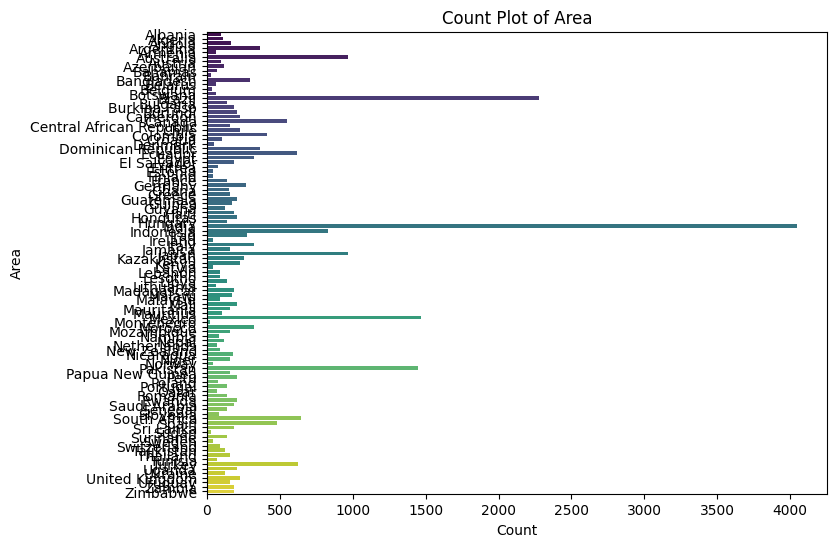

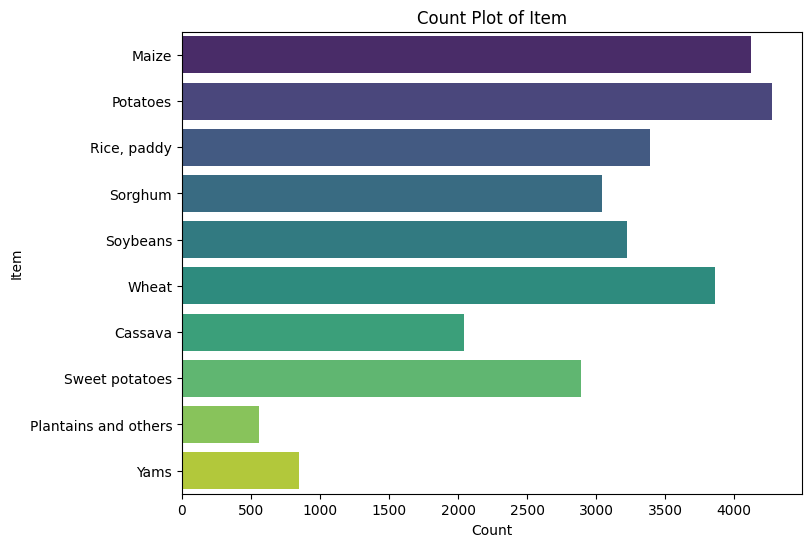

In [146]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming yield_df is already loaded
# Columns:
# Area (object), Item (object), Year (int64), hg/ha_yield (int64),
# average_rain_fall_mm_per_year (float64), pesticides_tonnes (float64), avg_temp (float64)

# 1. Count Plot for Categorical Variables (Area and Item)
categorical_columns = ['Area', 'Item']
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=yield_df[col], palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.ylabel(col)
    plt.xlabel('Count')
    plt.show()





#### Chart - 2

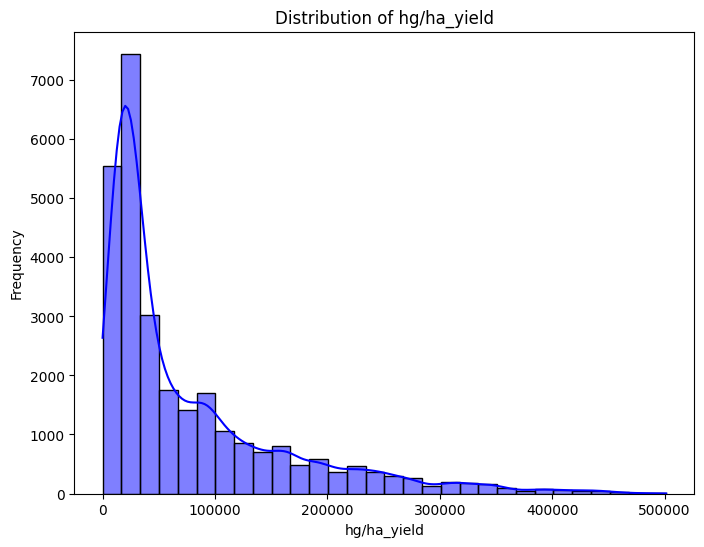

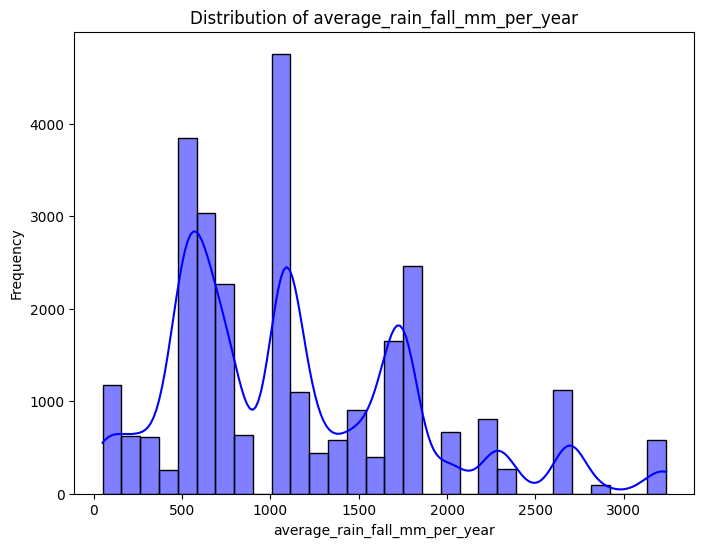

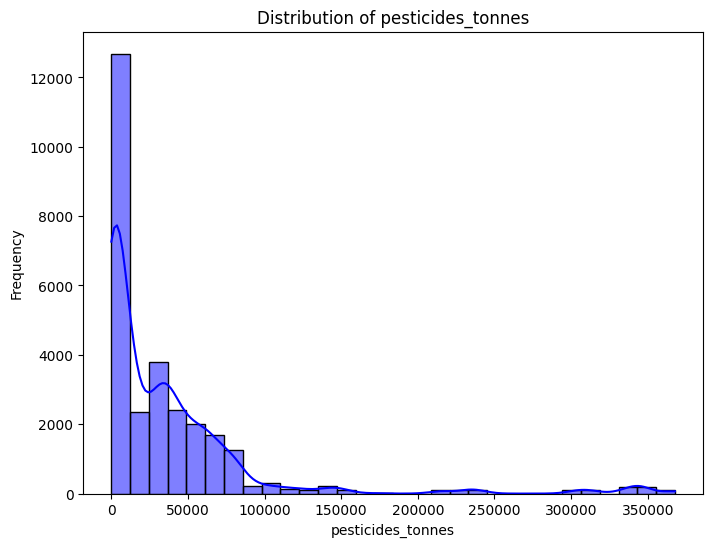

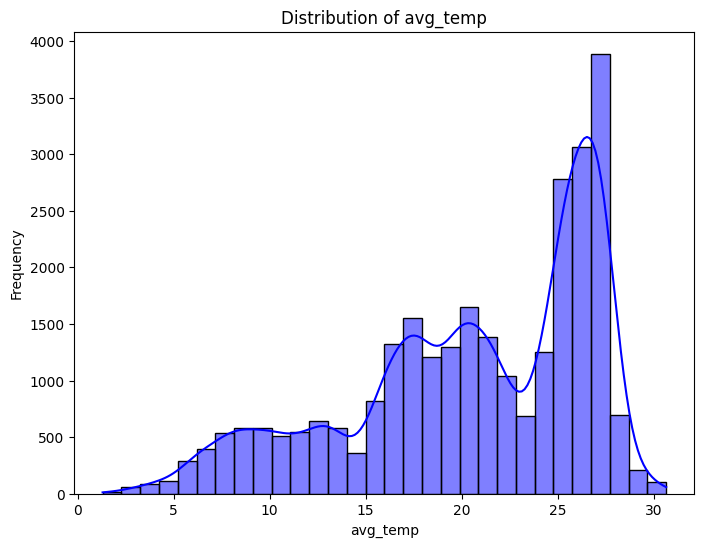

In [147]:
# 2. Distribution Plot (Histogram) for Numerical Variables
numerical_columns = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(yield_df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


#### Chart - 3

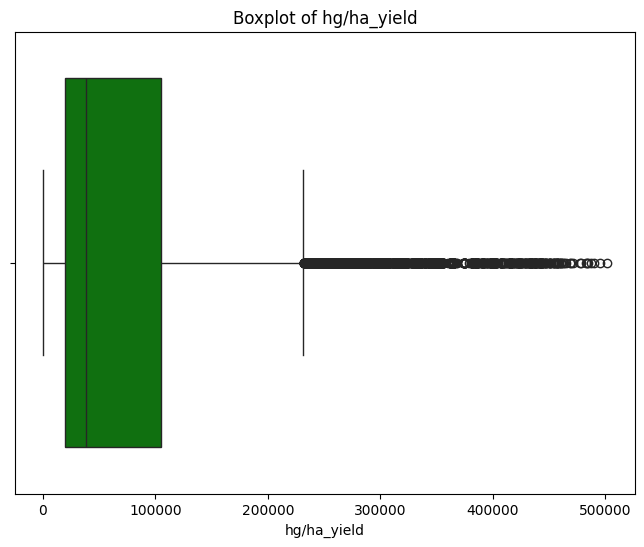

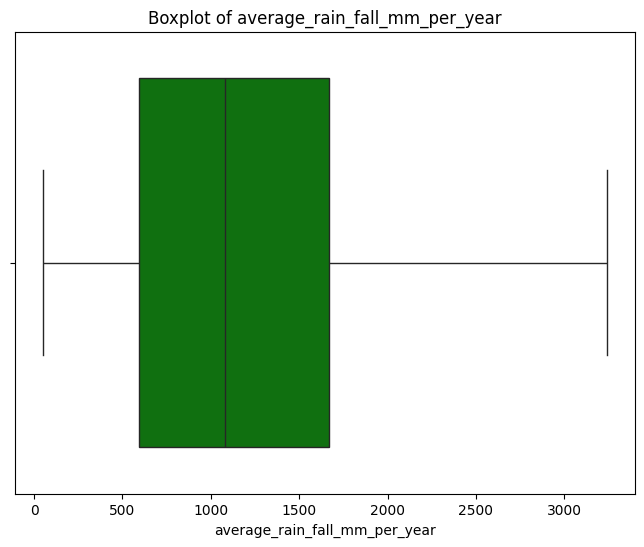

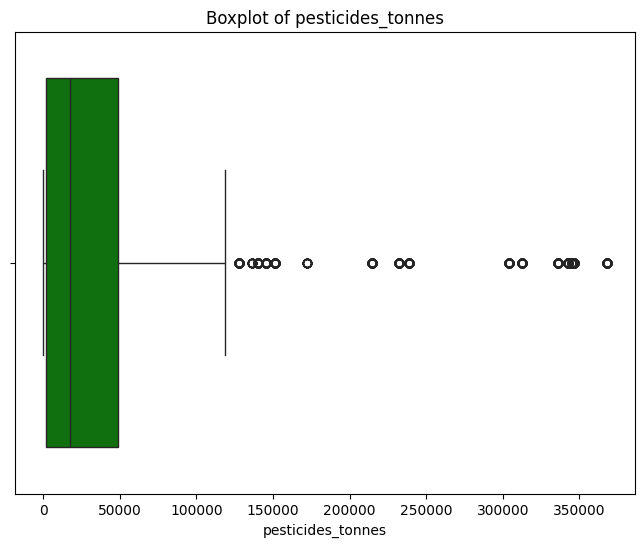

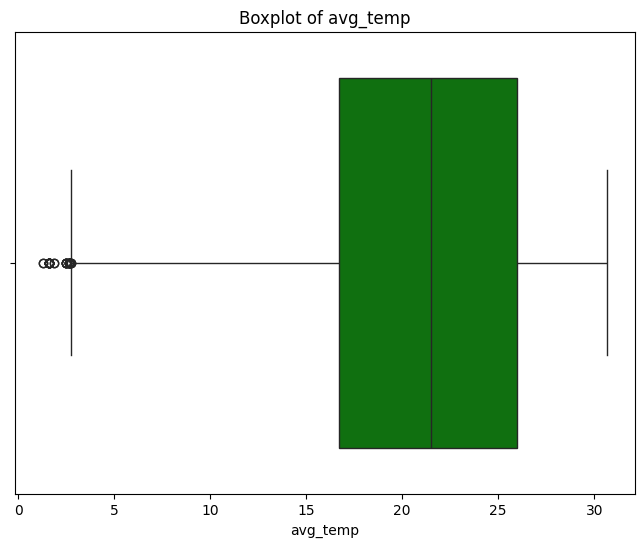

In [148]:
# 3. Boxplot for Numerical Variables
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=yield_df[col], color='green')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


#### Chart - 4

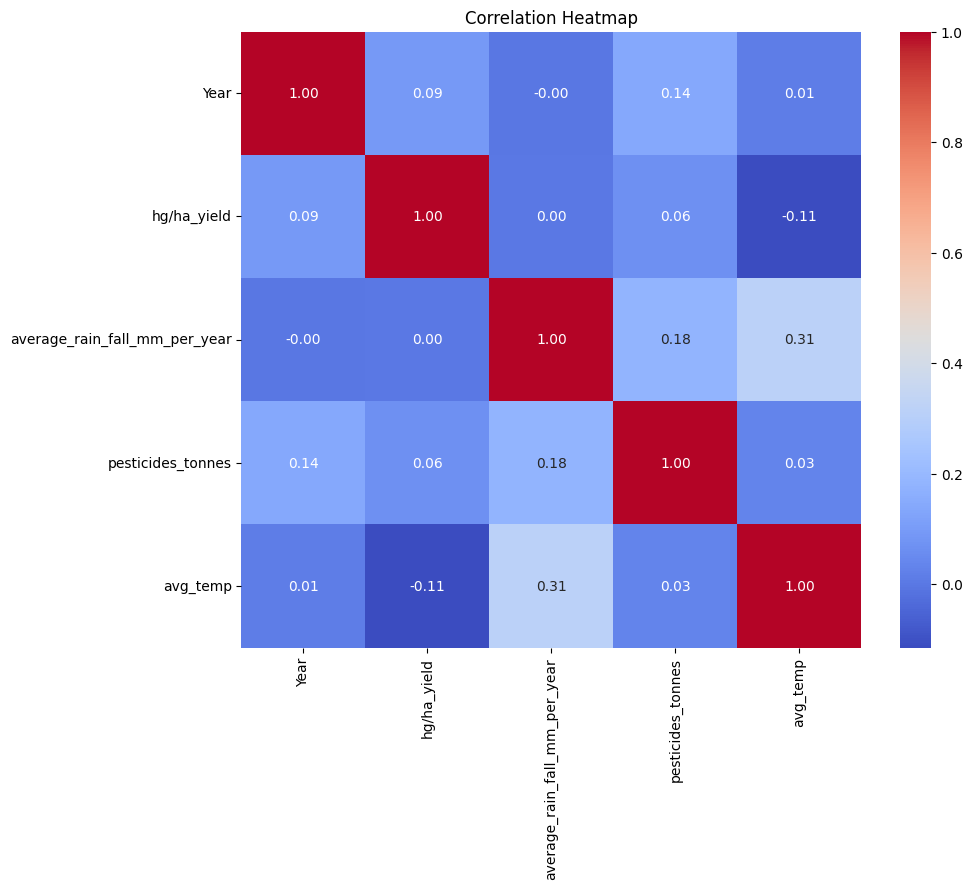

In [149]:

# 4. Correlation Heatmap for Numerical Variables
plt.figure(figsize=(10, 8))
correlation_matrix = yield_df[['Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



1. Why Choose this Chart?
* This correlation heatmap was chosen to visualize the relationships between key numerical variables, allowing quick identification of positive or negative correlations. It helps in understanding how variables interact and influence crop yield.

2. Insights
* Crop yield (hg/ha_yield) has a weak negative correlation with average temperature (-0.11), suggesting higher temperatures might slightly reduce yields.
* Rainfall has minimal correlation with yield but shows a moderate positive correlation with temperature (0.31), indicating regions with more rainfall tend to be warmer.
* Pesticide usage exhibits a weak positive correlation with yield (0.06), implying that its impact might depend on other factors like crop type or climatic conditions.

#### Chart - 5

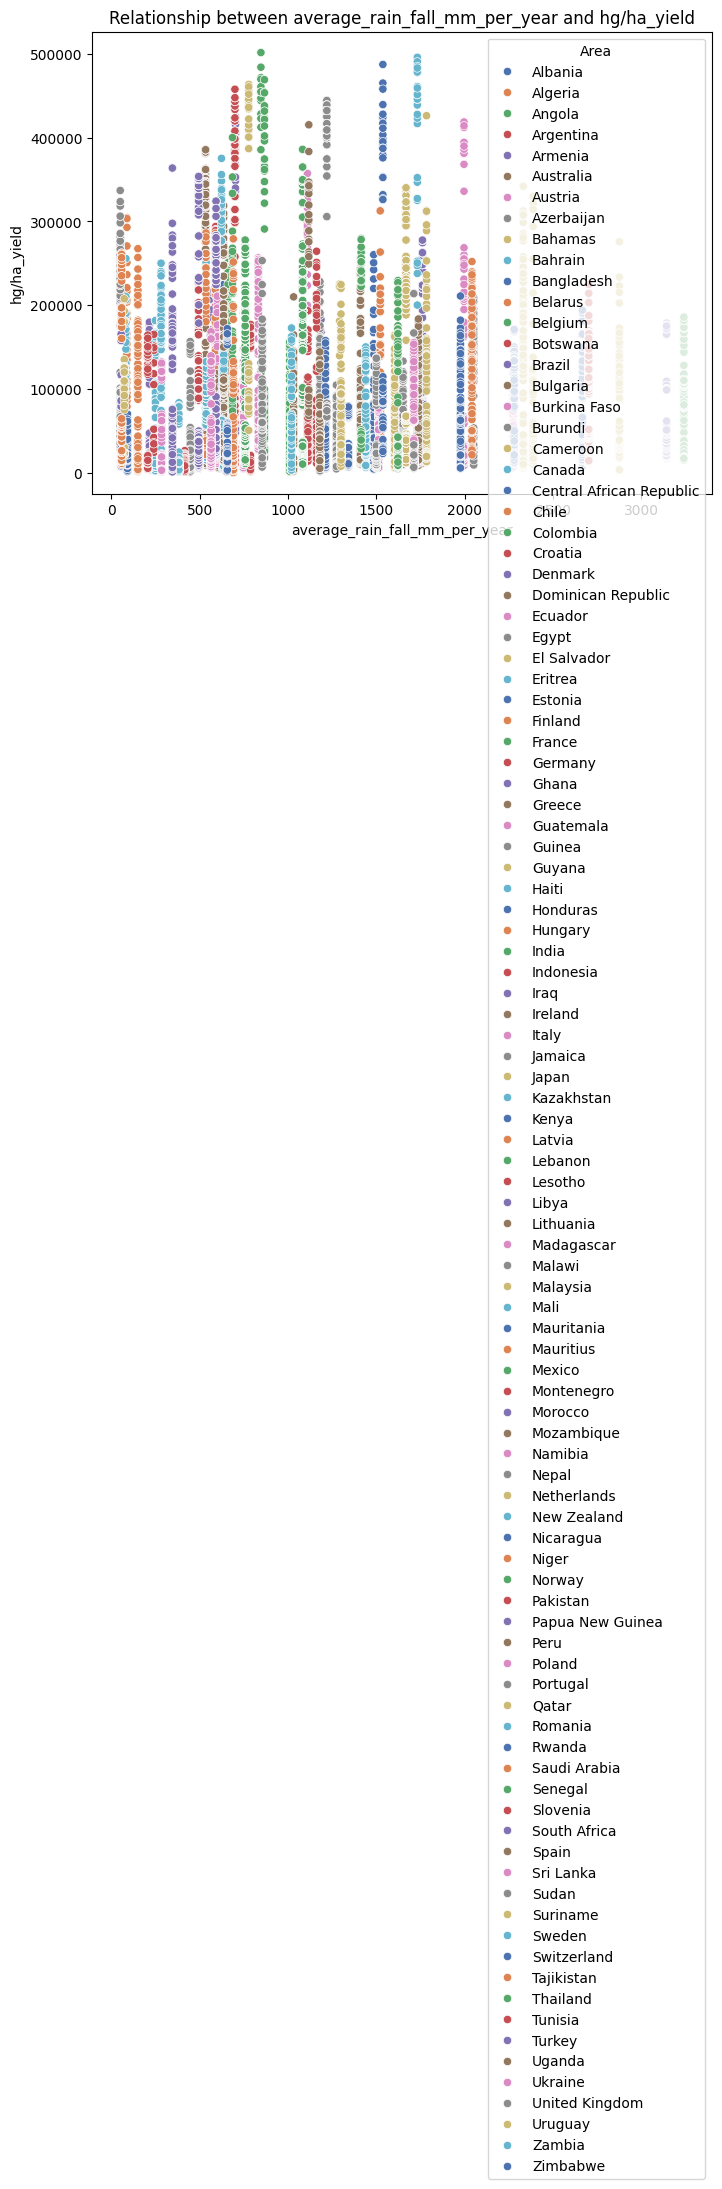

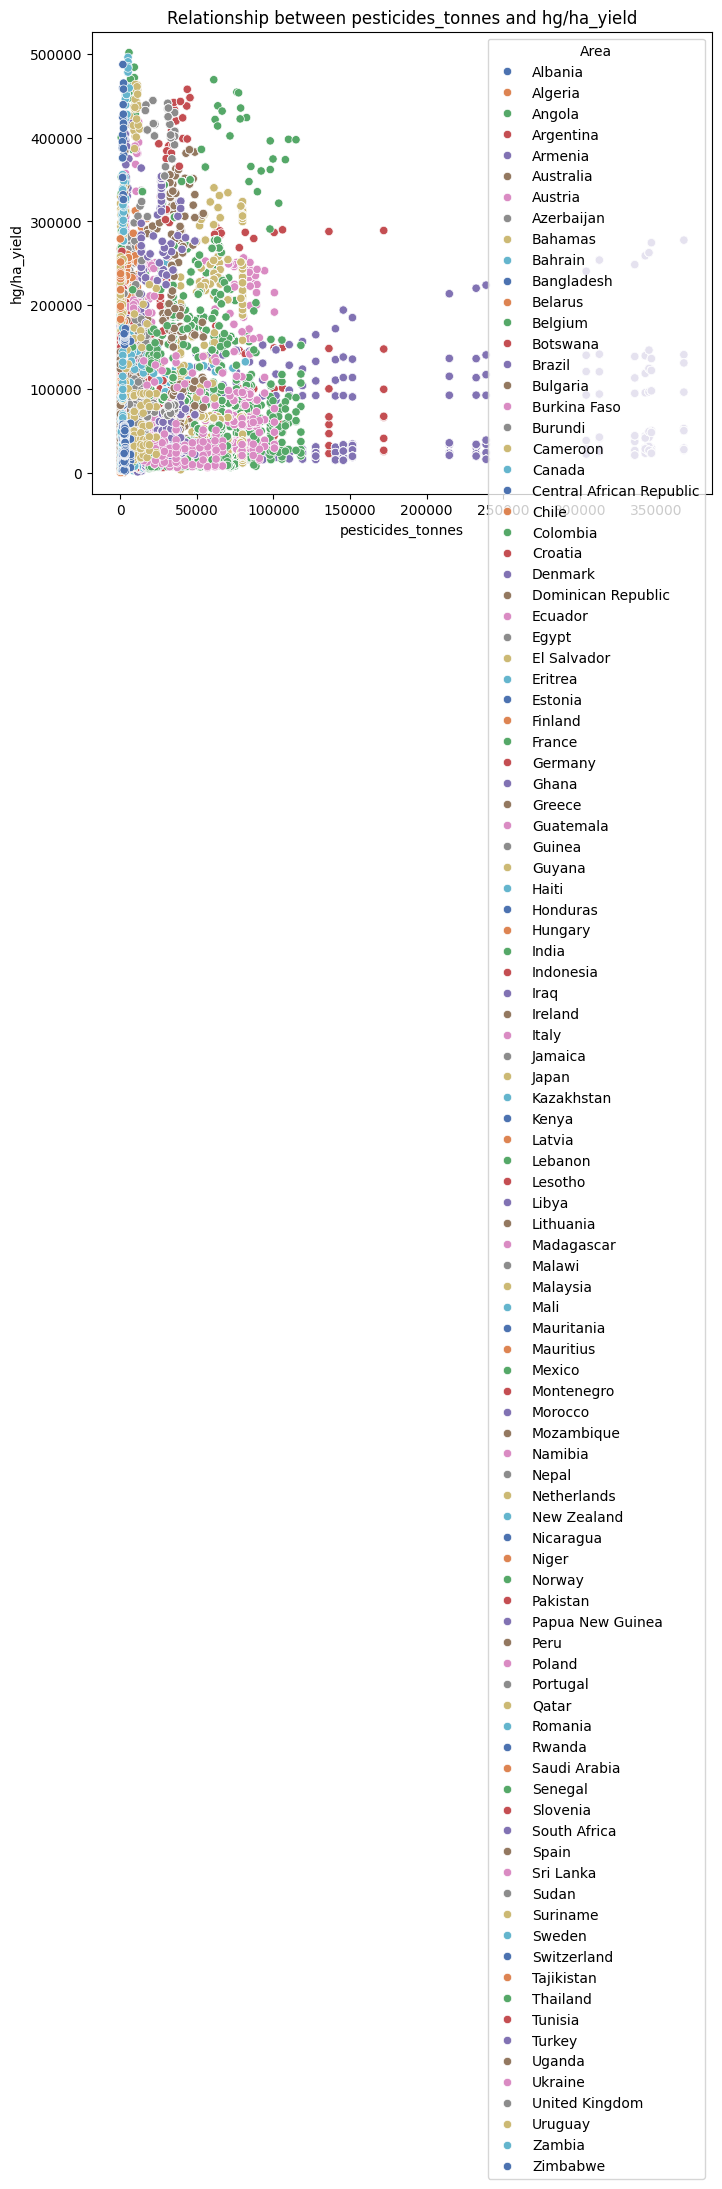

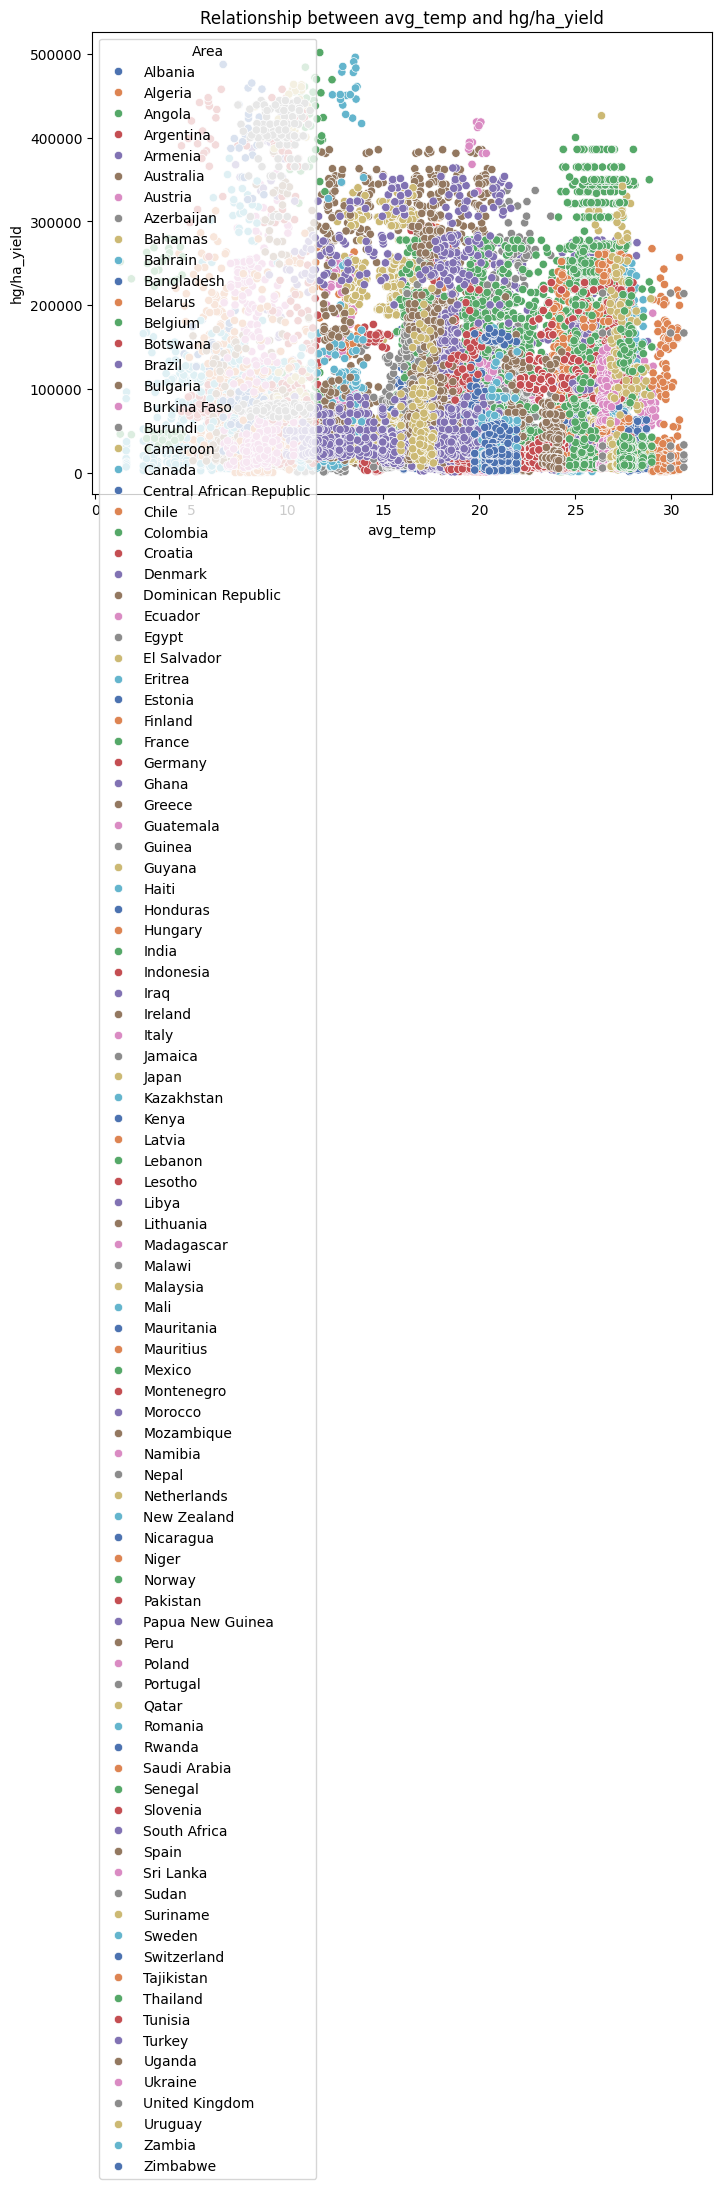

In [150]:
# 5. Scatter Plots to Explore Relationships with Yield
related_columns = ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
for col in related_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=yield_df[col], y=yield_df['hg/ha_yield'], hue=yield_df['Area'], palette='deep')
    plt.title(f'Relationship between {col} and hg/ha_yield')
    plt.xlabel(col)
    plt.ylabel('hg/ha_yield')
    plt.legend(title='Area')
    plt.show()

#### Chart - 6

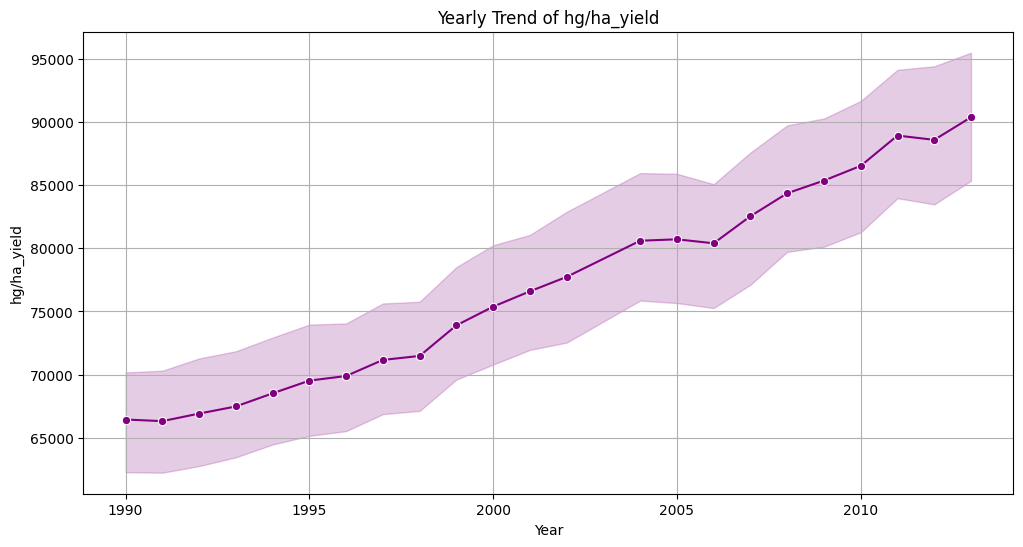

In [151]:

# 6. Time-Series Plot for Yearly Trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='hg/ha_yield', data=yield_df, marker='o', color='purple')
plt.title('Yearly Trend of hg/ha_yield')
plt.xlabel('Year')
plt.ylabel('hg/ha_yield')
plt.grid(True)
plt.show()


1. Why Choose this chart?
* Line plots are well-suited for visualizing trends over time, making it easier to observe changes and patterns.

2. Insights
* The yield (hg/ha_yield) shows a steady increase over the years from 1990 to 2010, indicating improvements in agricultural productivity.
*The shaded area indicates a growing spread or variability in yield as time progresses. This could imply increasing variability in factors affecting yield (e.g., weather conditions, usage of pesticides, etc.).

#### chart - 7

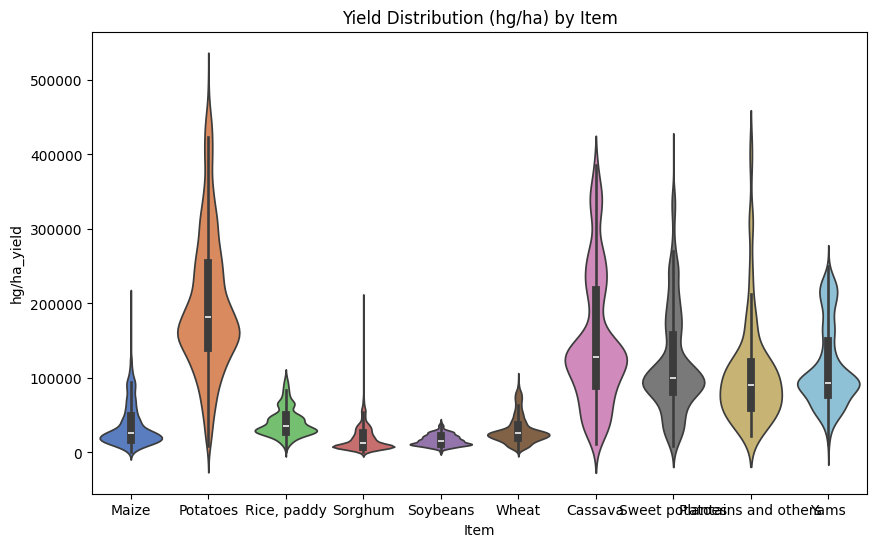

In [152]:
# 7. Violin Plot for Yield Distribution by Item
plt.figure(figsize=(10, 6))
sns.violinplot(data=yield_df, x='Item', y='hg/ha_yield', palette='muted')
plt.title('Yield Distribution (hg/ha) by Item')
plt.xlabel('Item')
plt.ylabel('hg/ha_yield')
plt.show()


1. Why Choose this chart?
* We chose the violin plot to visualize the distribution and spread of crop yield (hg/ha) for different items, as it combines box plot features with kernel density estimation, providing deeper insights into the data. It helps identify variations, medians, and potential outliers.

2. Insights
* Potatoes have the highest yield distribution, with a wider spread and higher median compared to other crops.
* Crops like sorghum and soybeans show lower yield distributions with tightly packed data points.
* Cassava and sweet potatoes display notable variations, indicating diverse cultivation conditions or yield potential.

#### Chart - 8

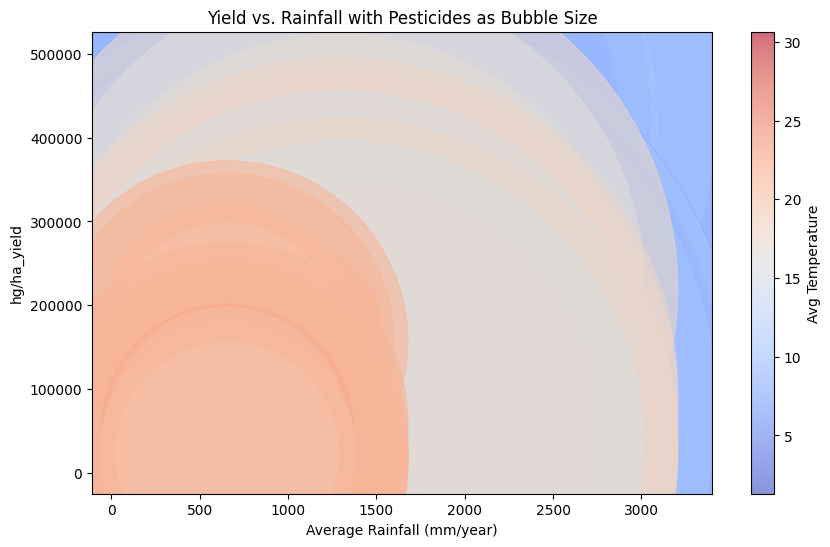

In [153]:
# 8. Bubble Chart: Yield vs. Rainfall with Pesticides as Size
plt.figure(figsize=(10, 6))
plt.scatter(
    yield_df['average_rain_fall_mm_per_year'],
    yield_df['hg/ha_yield'],
    s=yield_df['pesticides_tonnes']*10,  # Size of bubbles
    alpha=0.6,
    c=yield_df['avg_temp'],  # Color bubbles based on temperature
    cmap='coolwarm'
)
plt.colorbar(label='Avg Temperature')
plt.title('Yield vs. Rainfall with Pesticides as Bubble Size')
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('hg/ha_yield')
plt.show()


1. Why Choose this chart?
* This heatmap with overlaid contour lines is chosen to depict the relationship between crop yield, rainfall, and temperature, while also incorporating pesticide usage as bubble size, offering a comprehensive multidimensional analysis. It helps to visualize how these variables interact and affect yield.

2. Insights:

Higher yields are concentrated at moderate rainfall levels (around 1000-2000 mm/year) and higher pesticide usage, with optimal temperature ranges (15-25°C).
Extremely high or low rainfall correlates with reduced yields, possibly indicating unfavorable growing conditions.
Temperature extremes (both very low and very high) lead to lower yields, emphasizing the importance of optimal climatic conditions for agriculture.

# **Data Preprocessing**

Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.  




In [155]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Maize,1991,29068,1485.0,121.0,15.36
2,Albania,Maize,1992,24876,1485.0,121.0,16.06
3,Albania,Maize,1993,24185,1485.0,121.0,16.05
4,Albania,Maize,1994,25848,1485.0,201.0,16.96


### Encoding Categorical Variables:
There are two categorical columns in the dataframe, categorical data are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set, like in this case, items and countries values.
Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

This means that categorical data must be converted to a numerical form. **One hot encoding** is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. For that purpose, One-Hot Encoding will be used to convert these two columns to one-hot numeric array.

The categorical value represents the numerical value of the entry in the dataset. This encoding will create a binary column for each category and returns a matrix with the results.


#### One-hot encode

The code one-hot encodes the categorical columns Area and Item in the dataset yield_df, adding prefix labels (Country and Item, respectively) for clarity. It then separates the dataset into features (all columns except hg/ha_yield) and label (target variable hg/ha_yield), displaying the first few rows of the features dataframe for verification.

In [157]:
yield_df_onehot = pd.get_dummies(yield_df, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield']
label=yield_df['hg/ha_yield']
features.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1991,1485.0,121.0,15.36,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1992,1485.0,121.0,16.06,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1993,1485.0,121.0,16.05,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,1994,1485.0,201.0,16.96,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [158]:
features = features.drop(['Year'], axis=1)

In [159]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Columns: 114 entries, average_rain_fall_mm_per_year to Item_Yams
dtypes: bool(111), float64(3)
memory usage: 3.6 MB


In [160]:
features.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485.0,121.0,16.37,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1485.0,121.0,15.36,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1485.0,121.0,16.06,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,1485.0,121.0,16.05,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,1485.0,201.0,16.96,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False



### Scaling Features:

Taking a look at the dataset above, it contains features highly varying in magnitudes, units and range. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

In [161]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features)

In [162]:
features

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 4.79045997e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.02896082e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 9.08240940e-03, 6.63713799e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 9.17806494e-03, 6.54855196e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

## Training Data:

The dataset will be split to two datasets, the training dataset and test dataset. The data is usually tend to be split inequality because training the model usually requires as much data-points as possible.The common splits are 70/30 or 80/20 for train/test.

The training dataset is the intial dataset used to train ML algorithm to learn and produce right predictions. (70% of dataset is training dataset)

The test dataset, however, is used to assess how well ML algorithm is trained with the training dataset. You can’t simply reuse the training dataset in the testing stage because ML algorithm will already “know” the expected output, which defeats the purpose of testing the algorithm. (30% of dataset is testing dataset)



In [163]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

In [164]:
#write final df to csv file
yield_df.to_csv('../input/crop-yield-prediction-dataset/yield_df.csv')

In [165]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

# **Model Comparison & Selection**


In [166]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])

In [167]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
   DecisionTreeRegressor()
]

In [168]:
model_train=list(map(compare_models,models))

In [169]:
print(*model_train, sep = "\n")

['GradientBoostingRegressor', 0.8957918626438968]
['RandomForestRegressor', 0.6907655921247855]
['SVR', -0.1935660137136721]
['DecisionTreeRegressor', 0.9591714575081851]


The evaluation metric is set based on **R^2 (coefficient of determination)** regression score function, that will represents the proportion of the variance for items (crops) in the regression model. **R^2** score shows how well terms (data points) fit a curve or line.

**R^2** is a statistical measure between 0 and 1 which calculates how similar a regression line is to the data it’s fitted to. If it’s a 1, the model 100% predicts the data variance; if it’s a 0, the model predicts none of the variance.

From results viewd above, **Decision Tree Regressor** has the highest R^2 score 0f **96%**, **GradientBoostingRegressor** comes second.


 I'll also calculate **Adjusted R^2** also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase.
Adjusted R2 will always be less than or equal to R2.

In [170]:
yield_df_onehot = yield_df_onehot.drop(['Year'], axis=1)

In [171]:
yield_df_onehot.head()

,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,36613,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,29068,1485.0,121.0,15.36,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,24876,1485.0,121.0,16.06,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,24185,1485.0,121.0,16.05,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,25848,1485.0,201.0,16.96,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [172]:
#setting test data to columns from dataframe and excluding 'hg/ha_yield' values where ML model should be predicting

test_df=pd.DataFrame(test_data,columns=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield'].columns)

# using stack function to return a reshaped DataFrame by pivoting the columns of the current dataframe

cntry=test_df[[col for col in test_df.columns if 'Country' in col]].stack()[test_df[[col for col in test_df.columns if 'Country' in col]].stack()>0]
cntrylist=list(pd.DataFrame(cntry).index.get_level_values(1))
countries=[i.split("_")[1] for i in cntrylist]
itm=test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack()>0]
itmlist=list(pd.DataFrame(itm).index.get_level_values(1))
items=[i.split("_")[1] for i in itmlist]

In [173]:
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0.183443,0.090370,0.535264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.458451,0.000135,0.631005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.183443,0.132330,0.552300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.000000,0.179695,0.867802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.458451,0.000305,0.629983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [174]:
test_df.drop([col for col in test_df.columns if 'Item' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'Country' in col],axis=1,inplace=True)
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0.183443,0.090370,0.535264
1,0.458451,0.000135,0.631005
2,0.183443,0.132330,0.552300
3,1.000000,0.179695,0.867802
4,0.458451,0.000305,0.629983


In [175]:
test_df['Country']=countries
test_df['Item']=items
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country,Item
0,0.183443,0.090370,0.535264,Spain,Sweet potatoes
1,0.458451,0.000135,0.631005,Madagascar,Potatoes
2,0.183443,0.132330,0.552300,Spain,Sweet potatoes
3,1.000000,0.179695,0.867802,Colombia,Soybeans
4,0.458451,0.000305,0.629983,Madagascar,"Rice, paddy"


In [176]:
clf=DecisionTreeRegressor()
model=clf.fit(train_data,train_labels)

test_df["yield_predicted"]= model.predict(test_data)
test_df["yield_actual"]=pd.DataFrame(test_labels)["hg/ha_yield"].tolist()
test_group=test_df.groupby("Item")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

,0
Item,
Cassava,0.937905
Maize,0.886907
Plantains and others,0.630001
Potatoes,0.904381
"Rice, paddy",0.880292
Sorghum,0.746785
Soybeans,0.862520
Sweet potatoes,0.892896
Wheat,0.938962


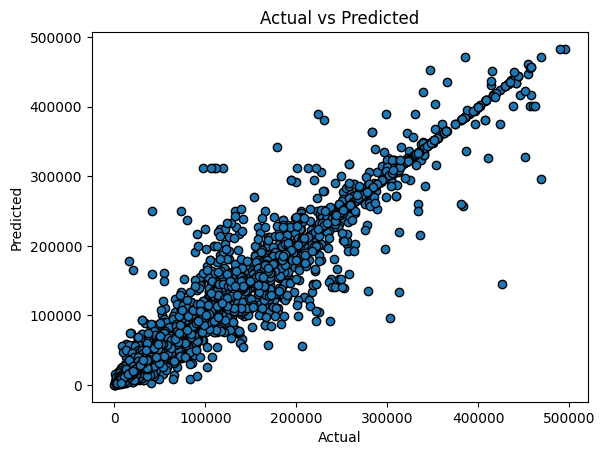

In [177]:
# So let's run the model actual values against the predicted ones

fig, ax = plt.subplots()

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [178]:
def adjusted_r_squared(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score

test_group.apply(lambda x: adjusted_r_squared(x.yield_actual,x.yield_predicted,x))

,0
Item,
Cassava,0.937092
Maize,0.886179
Plantains and others,0.609727
Potatoes,0.903779
"Rice, paddy",0.879400
Sorghum,0.744581
Soybeans,0.861304
Sweet potatoes,0.891863
Wheat,0.938536


# **Model Results & Conclusions**



In [179]:
varimp= {'imp':model.feature_importances_,'names':yield_df_onehot.columns[yield_df_onehot.columns!="hg/ha_yield"]}

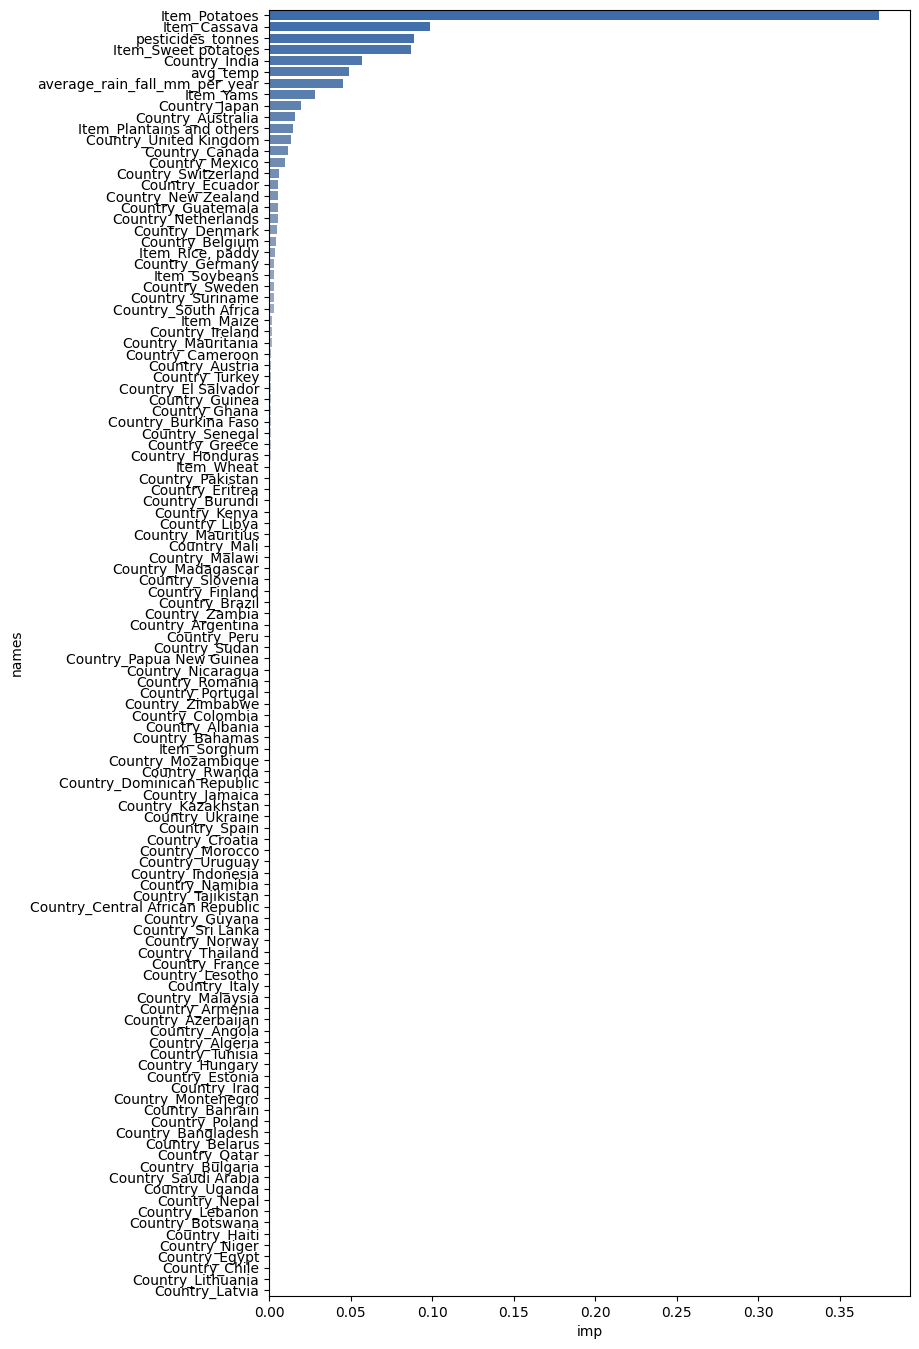

In [180]:
a4_dims = (8.27,16.7)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

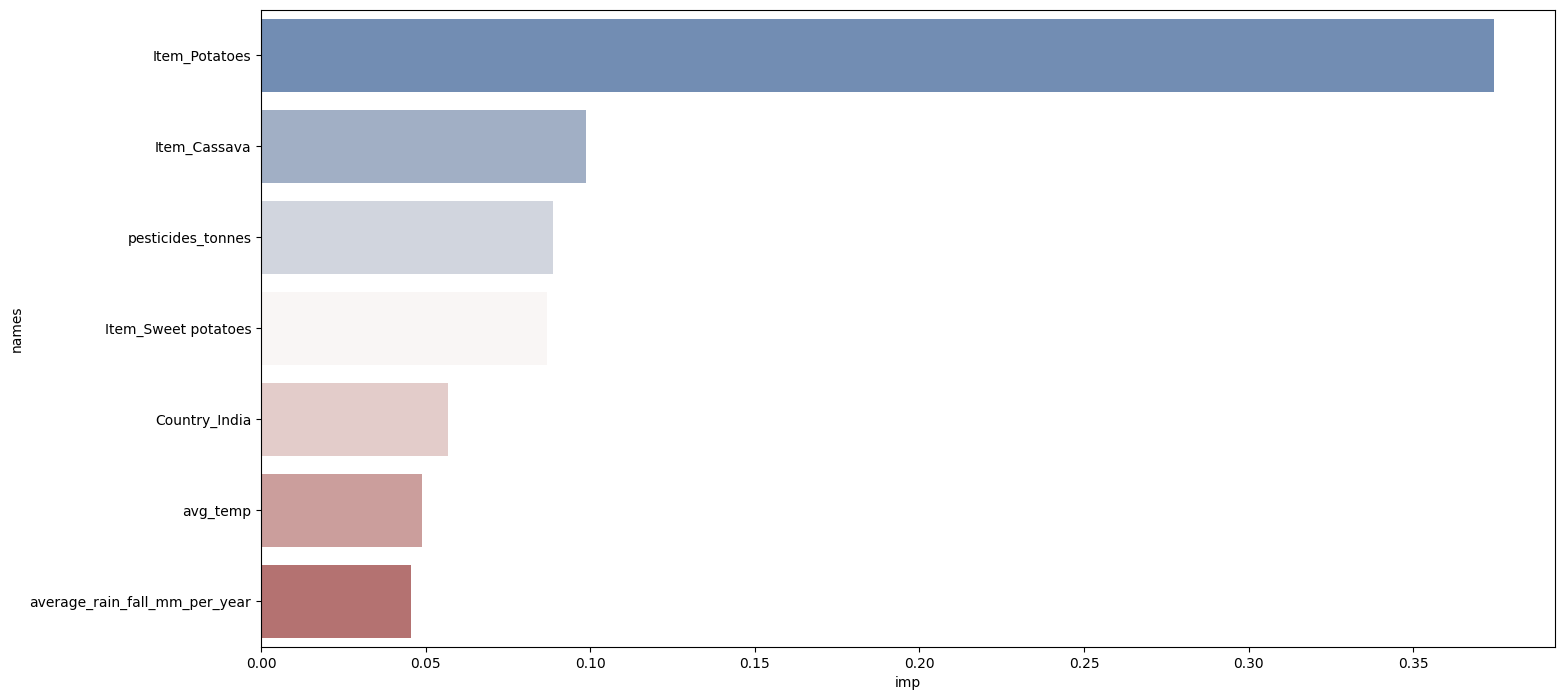

In [181]:
#7 most important factors that affect crops
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
df=df.nlargest(7, 'imp')
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

The crop being potatoes has the highest importance in the decision making for the model, where it's the highest crops in the dataset. Cassava too, then as expected we see the effect of pesticides, where its the third most important feature, and then if the crop is sweet potatoes, we see some of the highest crops in features importance in dataset.

If the crop is grown in India, makes sense since India has the largest crops sum in the dataset. Then comes rainfall and temprature. Thr first assumption about these features were correct, where they all significanally impact the expected crops yield in the model.

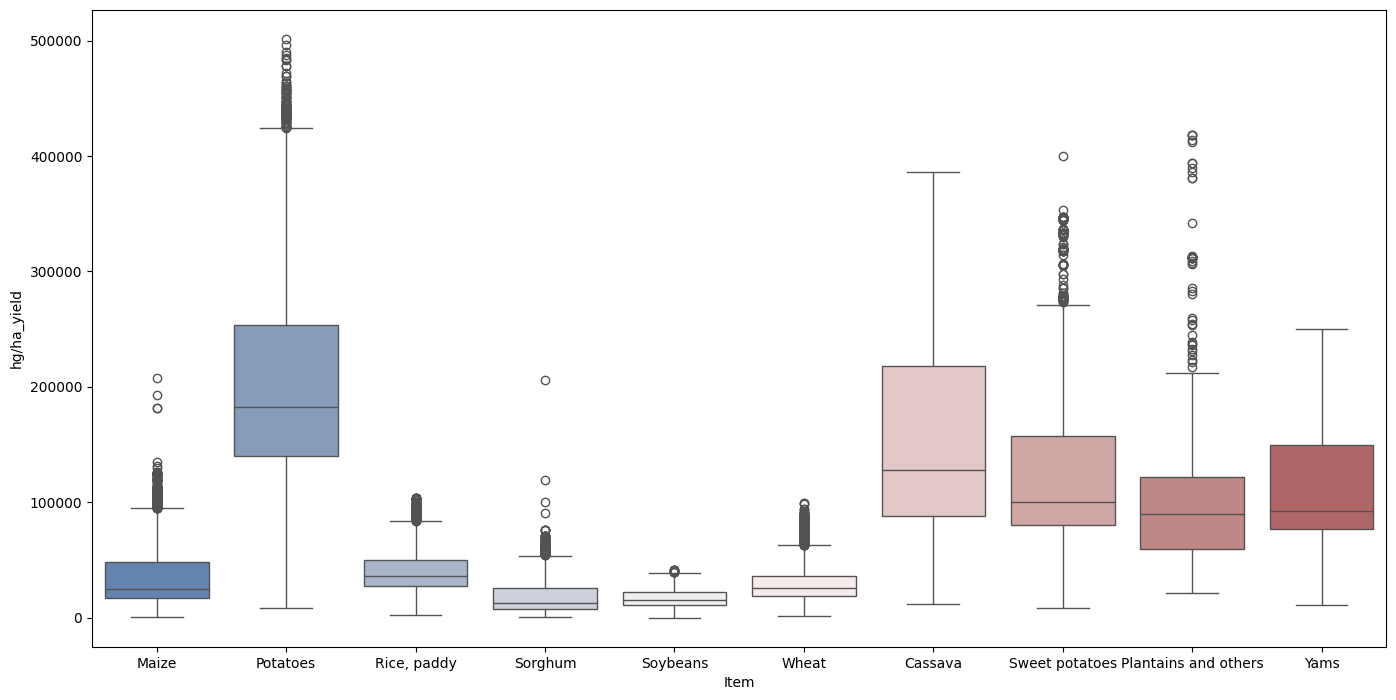

In [182]:
#Boxplot that shows yield for each item
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="vlag",data=yield_df,ax=ax);